In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [3]:
remanga = pd.read_csv('./data/raw/remanga_catalog_full.csv')
mangalib = pd.read_csv('./data/raw/mangalib_catalog_titles.csv')
gmanga_matched = pd.read_csv('data/gmanga_matched_remanga_mangalib.csv', sep=';')
gmint_matched = pd.read_csv('data/gmint_matched_remanga_mangalib.csv', sep=';')

In [21]:
gmanga_matched.head(1)

,id,name,eng_name,original_name,another_names,chapters_count,remanga_id,mangalib_id
0,1,Ван Пис,One Piece,One Piece,Budak Getah / Большой Куш / ワンピース / Один Кусок,1028,489.0,85.0


In [22]:
gmint_matched.head(1)

,id,name,eng_name,original_name,another_names,chapters_count,remanga_id,mangalib_id
0,11,Денег нет!,No money,Okane ga nai,お金がないっ / 午夜情深 / 没有钱,116,9766.0,NaN


In [17]:
# clean data
def del_useless_cols(df):
    useless = list(filter(lambda col: col.lower().count('unnamed')>0, df.columns.tolist()))
    df = df[df.name != '0']
    return df.drop(useless, axis=1)

gmanga_matched = del_useless_cols(gmanga_matched)
gmint_matched = del_useless_cols(gmint_matched)
remanga.loc[:, 'id'] = list(range(len(remanga)))

In [18]:
def get_matched(df):
    return df[(~df.remanga_id.isna() | (~df.mangalib_id.isna()))]

In [19]:
len(get_matched(gmint_matched) )/ len(gmint_matched)

0.24145001830831198

In [20]:
len(get_matched(gmanga_matched) )/ len(gmanga_matched)

0.5302280912364946

In [23]:
fetch_valid_ixs = lambda df, col: df[~df[col].isna()][col].tolist()
remanga_matched_ids = []
remanga_matched_ids += fetch_valid_ixs(gmanga_matched, 'remanga_id')
remanga_matched_ids += fetch_valid_ixs(gmint_matched, 'remanga_id')

In [24]:
remanga[~remanga.id.isin(remanga_matched_ids)]

,rus_name,en_name,issue_year,avg_rating,total_views,total_votes,type,dir,n_chapters,id
3,Герой иного мнения,Hero with another opinion,2020.0,9.2,458051,111061,Рукомикс,hero-with-another-opinion,9.0,3
7,"Архимаг, который вернулся спустя 4000 лет",The archmage who returned after 4000 years,2020.0,9.0,3786103,684219,Манхва,the-archmage-who-returned-after-4000-years,82.0,7
28,Я убил Бессмертного,I Killed The Immortal,2021.0,9.1,74032,17948,Рукомикс,i-killed-the-immortal,3.0,28
29,"Раб ""Б"" ранга","""B"" rank slave",2020.0,7.9,1715203,290731,Манхва,b-rank-slave,58.0,29
36,Во всеоружии,Overgeared (Пак Сэналь),2020.0,9.1,1908919,351136,Манхва,overgeared--,76.0,36
...,...,...,...,...,...,...,...,...,...,...
16607,Мой парень в опасности,Boyfriend is dangerous,2019.0,0.0,0,0,Манхва,boyfriend-is-dangerous,0.0,16607
16635,Незабудка,Forget-me-not (Obata Yuuki),2012.0,0.0,148,7,Манга,forgetmenot-obata-yuuki,7.0,16635
16672,Моя Дорогая Наложница,My Dear Concubine,2020.0,0.0,0,0,Маньхуа,my-dear-concubine,0.0,16672
16850,Фея-полукровка,1|2 Fairy!,1985.0,0.0,55,0,Манга,12-fairy,3.0,16850


In [26]:
len(remanga[~remanga.id.isin(remanga_matched_ids)]) / len(remanga)

0.21113675365406237

In [37]:
len(rm_views_missing[rm_views_missing>100000]) / len(rm_views_missing)

0.05577354260089686

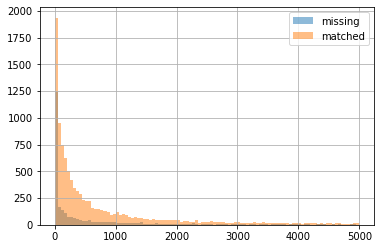

In [28]:
rm_views_missing = remanga[~remanga.id.isin(remanga_matched_ids)].total_views
rm_views_matched = remanga[ remanga.id.isin(remanga_matched_ids)].total_views
n = 5000
rm_views_missing[rm_views_missing < n].hist(bins=100, alpha=0.5)
rm_views_matched[rm_views_matched < n].hist(bins=100, alpha=0.5)
plt.legend(['missing', 'matched'])

In [38]:
remanga[~remanga.id.isin(remanga_matched_ids)].to_csv('./data/missing/remanga_exclusive.csv', sep=';')

In [40]:
mangalib_matched_ids = []
mangalib_matched_ids += fetch_valid_ixs(gmanga_matched, 'mangalib_id')
mangalib_matched_ids += fetch_valid_ixs(gmint_matched, 'mangalib_id')

In [41]:
mangalib[~mangalib.id.isin(mangalib_matched_ids)]

,id,link,data_id,manga_type,name
2,2,poidyom-gulyat,67688,Руманга,Пойдём гулять!
8,8,bastard-hwang-youngchan,2035,Манхва,Сволочь
9,9,ranker-who-lives-a-second-time,12478,Манхва,"Ранкер, который живет второй раз"
11,11,nan-hao-shang-feng,18406,Маньхуа,Нань Хао и Шан Фэнь
19,19,agnyeoneun-molaesigyeleul-doedollinda-manhwa,24548,Манхва,"Злодейка, перевернувшая песочные часы"
...,...,...,...,...,...
1787,1787,great-sword,13710,Маньхуа,Легендарный бог меча
1788,1788,haikyuu-dj-ano-machi-ni-sunderu-karera-no-koto...,8833,Манга,"О тех, кто живет в том городе"
1793,1793,zhi-zun-kuang-di-xi-tong,35272,Маньхуа,Система Верховного Императора
1796,1796,my-fiance-is-in-love-with-my-little-sister,31862,Манга,Мой жених влюбился в мою младшую сестру


In [42]:
len(mangalib[~mangalib.id.isin(mangalib_matched_ids)]) / len(mangalib)

0.2411111111111111

In [43]:
mangalib[~mangalib.id.isin(mangalib_matched_ids)].to_csv('./data/missing/mangalib_exclusive.csv', sep=';')

In [44]:
# add number of remanga chapters
cond = ~gmanga_matched.remanga_id.isna()
remanga_ids = gmanga_matched.loc[cond].remanga_id.astype(int)
gmanga_matched.loc[cond, 'remanga_chapters_n'] = remanga.set_index('id').loc[remanga_ids].n_chapters.tolist()

In [45]:
is_num = lambda s: (all(list(map(lambda c: c.isdigit() or c == '.', str(s)))))

chapters_n = gmanga_matched[['chapters_count', 'remanga_chapters_n']]
chapters_n = chapters_n[(chapters_n['chapters_count'].apply(is_num)) & 
                        (chapters_n['remanga_chapters_n'].apply(is_num))].astype(float)

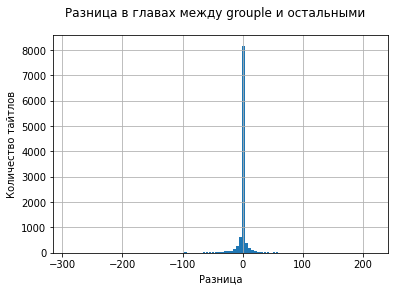

In [46]:
chapters_diff = chapters_n['chapters_count'] - chapters_n['remanga_chapters_n']
CHAPTERS_DIFF = 0
chapters_diff[abs(chapters_diff)>=CHAPTERS_DIFF].hist(bins=100, rwidth=0.9)
plt.suptitle('Разница в главах между grouple и остальными')
plt.xlabel('Разница')
plt.ylabel('Количество тайтлов')
plt.savefig('pics/chapters_diff.png')

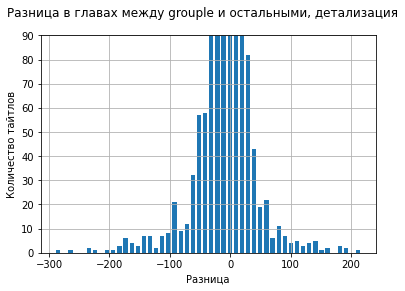

In [47]:
CHAPTERS_DIFF = 0
chapters_diff[abs(chapters_diff)>=CHAPTERS_DIFF].hist(bins=50, rwidth=0.7)
plt.ylim(0, 90)
plt.suptitle('Разница в главах между grouple и остальными, детализация')
plt.xlabel('Разница')
plt.ylabel('Количество тайтлов')
plt.savefig('pics/chapters_diff_detailed.png')